# Описание проекта

### Цели и задачи проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Для этого необходимо построить модель с предельно большим значением `F1-меры` превышающим значение 0.59.

### Описание данных

Банк предоставил исторические данные о поведении клиентов и расторжении договоров с банком. Данные находятся в файле `Churn.csv` со следующими признаками:
+ `RowNumber` — индекс строки в данных
+ `CustomerId` — уникальный идентификатор клиента
+ `Surname` — фамилия
+ `CreditScore` — кредитный рейтинг
+ `Geography` — страна проживания
+ `Gender` — пол
+ `Age` — возраст
+ `Tenure` — сколько лет человек является клиентом банка
+ `Balance` — баланс на счёте
+ `NumOfProducts` — количество продуктов банка, используемых клиентом
+ `HasCrCard` — наличие кредитной карты
+ `IsActiveMember` — активность клиента
+ `EstimatedSalary` — предполагаемая зарплата
+ `Exited` — факт ухода клиента

### План работы

+ Подготовим данные
+ Исследуем баланс классов
+ Обучим разные модели с разными параметрами и найдём лучший вариант
+ Проведём финальное тестирование

# Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

try:
    df = pd.read_csv('Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv')

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [2]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3.0,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4.0,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2.0,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7.0,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

В названиях колонок присутствуют заглавные буквы. Приведём все названия к единому стилю `snake_case`.

In [6]:
df = df.rename(
    columns={
        'RowNumber': 'row_number',
        'CustomerId': 'customer_id',
        'Surname': 'surname',
        'CreditScore': 'credit_score',
        'Geography': 'geography',
        'Gender': 'gender',
        'Age': 'age',
        'Tenure': 'tenure',
        'Balance': 'balance',
        'NumOfProducts': 'num_of_products',
        'HasCrCard': 'has_cr_card',
        'IsActiveMember': 'is_active_member',
        'EstimatedSalary': 'estimated_salary',
        'Exited': 'exited',
    }
)

Ещё раз посмотрим названия колонок таблицы `df` после сделанных изменений и опишем данные в каждом столбце.

In [7]:
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Описание данных в столбцах:

+ `row_number` — индекс строки в данных
+ `customer_id` — уникальный идентификатор клиента
+ `surname` — фамилия
+ `credit_score` — кредитный рейтинг
+ `geography` — страна проживания
+ `gender` — пол
+ `age` — возраст
+ `tenure` — сколько лет человек является клиентом банка
+ `balance` — баланс на счёте
+ `num_of_products` — количество продуктов банка, используемых клиентом
+ `has_cr_card` — наличие кредитной карты
+ `is_active_member` — активность клиента
+ `estimated_salary` — предполагаемая зарплата
+ `exited` — факт ухода клиента

В нашем наборе данных столбец `exited` — это целевой признак, который нужно предсказать по остальным признакам. Так как целевой признак категориальный и категорий всего две (1 или 0), то мы имеем дело с задачей <b>бинарной классификации</b>.

# Подготовка данных

Будем придерживаться принципа GIGO (garbage in, garbage out) и постараемся максимально качественно подготовить наши данные. Для начала проверим наши данные на наличие явных дубликатов, чтобы избежать обучения модели на одних и тех же клиентах банка.

In [8]:
df.duplicated().sum()

0

Признаки `row_number`, `customer_id` и `surname` никак не помогут нашей модели в предсказании целевого признака, поэтому просто удалим их. Также на этапе обзора данных было выявлено, что в столбце `tenure` есть пропуски, которые составляют 9% от общего объёма данных. Удалим их.

In [9]:
df = df.drop(['row_number', 'customer_id', 'surname'] , axis=1)
df = df.dropna(subset=['tenure'])

Признаки `geography` и `gender` — категориальные и имеют тип `object`. Приведём их к типу `int`, используя технику прямого кодирования `OHE`. Также предварительно посмотрим их уникальные значения, чтобы избежать включения случайных значений.

In [10]:
[
    df.geography.unique(),
    df.gender.unique()
]

[array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [11]:
df = pd.get_dummies(df, drop_first=True)

Признаки `tenure`, `balance` и `estimated_salary` приведём к типу `int`, так как нет никакой необходимости держать их в типе `float`.

In [12]:
df = df.astype({
    'tenure': 'int',
    'balance': 'int',
    'estimated_salary': 'int'
})

Напоследок посмотрим уникальные значения оставшихся признаков на предмет выбивающихся значений.

In [13]:
[
    df.age.sort_values().unique(),
    df.tenure.sort_values().unique(),
    df.num_of_products.unique(),
    df.has_cr_card.unique(),
    df.is_active_member.unique(),
    df.exited.unique()
]

[array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        88, 92], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([1, 3, 2, 4], dtype=int64),
 array([1, 0], dtype=int64),
 array([1, 0], dtype=int64),
 array([1, 0], dtype=int64)]

У признаков `balance` и `estimated_salary` проверим минимум и максимум.

In [14]:
[
    df.balance.min(),
    df.balance.max(),
    df.estimated_salary.min(),
    df.estimated_salary.max()
]

[0, 250898, 11, 199992]

Выбивающимся выглядит только значение минимальной предпологаемой зарплаты, размером в 11 рублей. Построим гистограмму, чтобы увидеть весь диапазон значений.

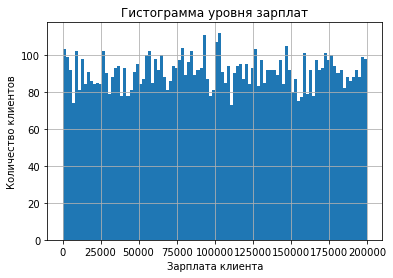

In [15]:
df.estimated_salary.plot(kind='hist', bins=100, grid = True)
plt.title('Гистограмма уровня зарплат')
plt.xlabel('Зарплата клиента')
plt.ylabel('Количество клиентов')
plt.show()

Величина прожиточного минимума колеблется в диапазоне от 10 до 14 тысяч рублей. Поэтому удалим все строки, где значение `estimated_salary` меньше 10 тысяч рублей и проверим сколько строк осталось в нашей таблице `df` после всех изменений.

In [16]:
df = df.query('estimated_salary > 10000')
len(df)

8622

Суммарные потери данных составили 13,8% от первоночального объёма. Можем переходить к разбивке данных на выборки.

# Разбивка данных на выборки

Разбивку данных будем проводить в следующем соотношении:
+ Обучающая выборка — 60%
+ Валидационная выборка — 20%
+ Тестовая выборка — 20%

In [17]:
features = df.drop(['exited'] , axis=1)
target = df['exited']

features_train, features_valid, target_train, target_valid = train_test_split(
    features,
    target,
    test_size=0.4,
    random_state=12345,
    stratify=target)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid,
    target_valid,
    test_size=0.5,
    random_state=12345,
    stratify=target_valid)

Проведём масштабирование данных, так как в признаках присутствует сильный разброс между значениями.

In [18]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary', 'num_of_products']

pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

# Исследование баланса классов

Посмотрим на соотношение классов целевого признака.

In [19]:
target.value_counts()

0    6863
1    1759
Name: exited, dtype: int64

In [20]:
target.value_counts(normalize=True)

0    0.795987
1    0.204013
Name: exited, dtype: float64

Нулей почти в 4 раза больше, чем единиц. Наблюдается сильный дисбаланс классов. Проведём пробное обучение модели логистической регрессии без учёта дисбаланса и посмотрим на значение метрики `F1-мера`.

In [21]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)
result

0.31223628691983124

Значение `F1-меры` не нулевое, но хуже модели, где значения угадывались бы просто рандомно. Прогноз класса `1` не удался. Теперь проведём пробное обучение модели логистической регрессии с учётом дисбаланса. Сделаем веса классов сбалансированными с помощью аргумента `class_weight`.

In [22]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)
result

0.49078564500484967

Значение `F1-меры` стало лучше, но всё ещё меньше 0.5 (модели с простым угадыванием).

# Подберём лучшую модель

Для борьбы с дисбалансом классов используем ещё два метода:
+ Увеличение количества редких значений
+ Уменьшение количества частых значений

Для этого создадим ещё две отдельные обучающие выборки.

In [23]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [24]:
features_train_upsample, target_train_upsample = upsample(features_train, target_train, 4)
features_train_downsample, target_train_downsample = downsample(features_train, target_train, 0.25)

balancing = [
    'Использование аргумента class_weight',
    'Увеличение количества редких значений через upsample',
    'Уменьшение количества частых значений через downsample'
]

## Модель — `Решающее дерево`

In [25]:
best_model = None
best_result = 0
best_auc_roc = 0
depth_of_tree = 0
best_index = 0

for depth in range(1, 21):
    # Создадим и обучим три модели для каждого способа борьбы с дисбалансом классов
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model_upsample = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_downsample = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    
    model.fit(features_train, target_train)
    model_upsample.fit(features_train_upsample, target_train_upsample)
    model_downsample.fit(features_train_downsample, target_train_downsample)
    
    all_models = [model, model_upsample, model_downsample]
    
    
    # Сделаем предсказания для каждой из трёх моделей
    predicted_valid = model.predict(features_valid)
    predicted_valid_upsample = model_upsample.predict(features_valid)
    predicted_valid_downsample = model_downsample.predict(features_valid)
    
    
    # Посчитаем F1-меру для каждой из трёх моделей
    result = f1_score(target_valid, predicted_valid)
    result_upsample = f1_score(target_valid, predicted_valid_upsample)
    result_downsample = f1_score(target_valid, predicted_valid_downsample)
    all_results = [result, result_upsample, result_downsample]
    
    
    # Посчитаем AUC-ROC для каждой из трёх моделей
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    
    probabilities_valid_upsample = model_upsample.predict_proba(features_valid)
    probabilities_one_valid_upsample = probabilities_valid_upsample[:, 1]
    auc_roc_upsample = roc_auc_score(target_valid, probabilities_one_valid_upsample)
    
    probabilities_valid_downsample = model_downsample.predict_proba(features_valid)
    probabilities_one_valid_downsample = probabilities_valid_downsample[:, 1]
    auc_roc_downsample = roc_auc_score(target_valid, probabilities_one_valid_downsample)
    
    all_auc_roc = [auc_roc, auc_roc_upsample, auc_roc_downsample]
    
    # Это будет индекс модели с лучшими показателями
    index = all_results.index(max(all_results))
    
    if max(all_results) > best_result:
        best_model = all_models[index]
        best_result = all_results[index]
        best_auc_roc = all_auc_roc[index]
        depth_of_tree = depth
        best_index = index

print('Модель - Решающее дерево. Лучшие показатели следующие:')
print(f'Глубина дерева: {depth_of_tree}')
print(f'F1-мера: {round(best_result, 2)}')
print(f'AUC-ROC: {round(best_auc_roc, 2)}')
print(f'Метод балансировки классов: {balancing[best_index]}')

Модель - Решающее дерево. Лучшие показатели следующие:
Глубина дерева: 5
F1-мера: 0.57
AUC-ROC: 0.83
Метод балансировки классов: Увеличение количества редких значений через upsample


## Модель — `Случайный лес`

In [26]:
best_model = None
best_result = 0
best_auc_roc = 0
depth_of_tree = 0
est_of_forest = 0
best_index = 0

for est in range(10, 51, 10):
    for depth in range (1, 11):
        # Создадим и обучим три модели для каждого способа борьбы с дисбалансом классов
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_upsample = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_downsample = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        
        model.fit(features_train, target_train)
        model_upsample.fit(features_train_upsample, target_train_upsample)
        model_downsample.fit(features_train_downsample, target_train_downsample)
        
        
        # Сделаем предсказания для каждой из трёх моделей
        predicted_valid = model.predict(features_valid)
        predicted_valid_upsample = model_upsample.predict(features_valid)
        predicted_valid_downsample = model_downsample.predict(features_valid)
        
        
        # Посчитаем F1-меру для каждой из трёх моделей
        result = f1_score(target_valid, predicted_valid)
        result_upsample = f1_score(target_valid, predicted_valid_upsample)
        result_downsample = f1_score(target_valid, predicted_valid_downsample)
        all_results = [result, result_upsample, result_downsample]
        
        
        # Посчитаем AUC-ROC для каждой из трёх моделей
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        
        probabilities_valid_upsample = model_upsample.predict_proba(features_valid)
        probabilities_one_valid_upsample = probabilities_valid_upsample[:, 1]
        auc_roc_upsample = roc_auc_score(target_valid, probabilities_one_valid_upsample)

        probabilities_valid_downsample = model_downsample.predict_proba(features_valid)
        probabilities_one_valid_downsample = probabilities_valid_downsample[:, 1]
        auc_roc_downsample = roc_auc_score(target_valid, probabilities_one_valid_downsample)

        all_auc_roc = [auc_roc, auc_roc_upsample, auc_roc_downsample]
        
        # Это будет индекс модели с лучшими показателями
        index = all_results.index(max(all_results))
        
        if max(all_results) > best_result:
            best_model = all_models[index]
            best_result = all_results[index]
            best_auc_roc = all_auc_roc[index]
            depth_of_tree = depth
            est_of_forest = est
            best_index = index
                   
print('Модель - Случайный лес. Лучшие показатели следующие:')
print(f'Глубина дерева: {depth_of_tree}')
print(f'Количество деревьев: {est_of_forest}')
print(f'F1-мера: {round(best_result, 2)}')
print(f'AUC-ROC: {round(best_auc_roc, 2)}')
print(f'Метод балансировки классов: {balancing[best_index]}')

Модель - Случайный лес. Лучшие показатели следующие:
Глубина дерева: 9
Количество деревьев: 20
F1-мера: 0.61
AUC-ROC: 0.85
Метод балансировки классов: Увеличение количества редких значений через upsample


## Модель — `Логистическая регрессия`

In [27]:
best_model = None
best_result = 0
best_auc_roc = 0
best_iter = 0
best_index = 0

for iter in range(100, 1001, 100):
    # Создадим и обучим три модели для каждого способа борьбы с дисбалансом классов
    model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=iter, class_weight='balanced')
    model_upsample = LogisticRegression(random_state=12345, solver='liblinear', max_iter=iter)
    model_downsample = LogisticRegression(random_state=12345, solver='liblinear', max_iter=iter)
    
    model.fit(features_train, target_train)
    model_upsample.fit(features_train_upsample, target_train_upsample)
    model_downsample.fit(features_train_downsample, target_train_downsample)
        
        
    # Сделаем предсказания для каждой из трёх моделей
    predicted_valid = model.predict(features_valid)
    predicted_valid_upsample = model_upsample.predict(features_valid)
    predicted_valid_downsample = model_downsample.predict(features_valid)
        
        
    # Посчитаем F1-меру для каждой из трёх моделей
    result = f1_score(target_valid, predicted_valid)
    result_upsample = f1_score(target_valid, predicted_valid_upsample)
    result_downsample = f1_score(target_valid, predicted_valid_downsample)
    all_results = [result, result_upsample, result_downsample]
        
        
    # Посчитаем AUC-ROC для каждой из трёх моделей
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        
    probabilities_valid_upsample = model_upsample.predict_proba(features_valid)
    probabilities_one_valid_upsample = probabilities_valid_upsample[:, 1]
    auc_roc_upsample = roc_auc_score(target_valid, probabilities_one_valid_upsample)

    probabilities_valid_downsample = model_downsample.predict_proba(features_valid)
    probabilities_one_valid_downsample = probabilities_valid_downsample[:, 1]
    auc_roc_downsample = roc_auc_score(target_valid, probabilities_one_valid_downsample)

    all_auc_roc = [auc_roc, auc_roc_upsample, auc_roc_downsample]
        
    # Это будет индекс модели с лучшими показателями
    index = all_results.index(max(all_results))
    
    if max(all_results) > best_result:
        best_model = all_models[index]
        best_result = all_results[index]
        best_auc_roc = all_auc_roc[index]
        best_iter = iter
        best_index = index
        
print('Модель - Логистическая регрессия. Лучшие показатели следующие:')
print(f'Количество итераций: {best_iter}')
print(f'F1-мера: {round(best_result, 2)}')
print(f'AUC-ROC: {round(best_auc_roc, 2)}')
print(f'Метод балансировки классов: {balancing[best_index]}')

Модель - Логистическая регрессия. Лучшие показатели следующие:
Количество итераций: 100
F1-мера: 0.49
AUC-ROC: 0.77
Метод балансировки классов: Уменьшение количества частых значений через downsample


<b>ИТОГО</b> — у модели случайного леса получился самый высокий показатель метрики качества `F1-мера`. Используем эту модель в качестве основной. В следующем блоке проверим её на финальной тестовой выборке. Метрика `AUC-ROC` во всех моделях больше, чем `F1-мера` и растёт с ростом `F1-меры`.

# Проверка модели на тестовой выборке

In [28]:
# Создадим модель случайного леса с количеством деревьев 20, глубиной дерева 9 и балансировкий через upsample
model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=9)
model.fit(features_train_upsample, target_train_upsample)
predicted_valid = model.predict(features_test)
result = f1_score(target_test, predicted_valid)

probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_valid)
    
[round(result, 2), round(auc_roc, 2)]

[0.63, 0.86]

Показатели метрик качества `F1-мера` и `AUC-ROC` даже немного выше, чем на валидационной выборке и больше необходимого минимального значения 0.59

# Общий вывод

Лучшие результаты показала модель случайного леса со следующими показателями на тестовой выборке:
+ Глубина дерева: 9
+ Количество деревьев: 20
+ F1-мера: 0.63
+ AUC-ROC: 0.86
+ Метод балансировки классов: Увеличение количества редких значений